In [3]:
import pandas as pd
import matplotlib.pyplot as plt


В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [45]:
df = pd.read_csv('weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [46]:
df.head(5)
df['Year'] = pd.DatetimeIndex(df['Day']).year
df['Month'] = pd.DatetimeIndex(df['Day']).month
df.head(5)

,Day,t,Year,Month
0,2008-01-01,0,2008,1
1,2008-01-02,-5,2008,1
2,2008-01-03,-11,2008,1
3,2008-01-04,-11,2008,1
4,2008-01-05,-12,2008,1


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [20]:
# ваш код
mx_t = -10000
mn_t = 10000
cold_year = 2008
warm_year = 2008
for i in range(2008, 2017):
    now_t = df.loc[(df['Year'] == i)]['t'].mean()
    if now_t > mx_t:
        mx_t = now_t
        warm_year = i
    if now_t < mn_t:
        mn_t = now_t
        cold_year = i
print('cold year is ', cold_year)
print('warm year is ', warm_year)

cold year is  2012
warm year is  2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [29]:
# ваш код
year = 2008
count = 0
for i in range(2008, 2017):
    days = df.loc[(df['Year'] == i) & (df['Month'] == 1) & (df['t'] >= 0)].shape[0]
    if days > count:
        count = days
        year = i

print(year)

2008


**3.** В каком году было самое холодное лето (по средней температуре)

In [32]:
# ваш код
mn_t = 10000
cold_year = 2008
for i in range(2008, 2017):
    now_t = df.loc[(df['Year'] == i) & (df['Month'] >= 6) & (df['Month'] <= 8)]['t'].mean()
    if now_t < mn_t:
        mn_t = now_t
        cold_year = i
print('cold summer year is ', cold_year)


cold summer year is  2008


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [57]:
# ваш код
df2 = df.copy()
df2.loc[-1] = df2.loc[0]  
df2.index = df2.index + 1  
df2 = df2.sort_index()  
df2['t'] -= df['t']
df2.head()
df.loc[df2['t'].idxmax()]

Day      2014-05-27 00:00:00
t                          7
Year                    2014
Month                      5
Name: 2335, dtype: object

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

<AxesSubplot:>

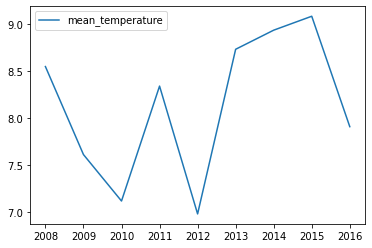

In [66]:
# ваш код
mean_df = pd.DataFrame({'mean_temperature': []})
for i in range(2008, 2017):
    mean_df.loc[i] = df.loc[(df['Year'] == i)]['t'].mean()
mean_df.plot()